## Import Libraries

In [95]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas.plotting as pdplt
import seaborn as sns
import math
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,QuantileTransformer,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from random import randint
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score

## Load Dataset

In [96]:
# Load transaction data
transaction_df = pd.read_csv('Historical-transaction-data.csv')

# Load store info data
store_df = pd.read_csv('Store-info.csv')

# Join the two datasets on store_id
merged_df = pd.merge(transaction_df, store_df, on='shop_id')

# Save the merged dataset to a new CSV file
merged_df.to_csv('Merged-data.csv', index=False)


In [122]:
print(merged_df.head())
duplicates = merged_df.duplicated().sum()
print("Duplicate rows = ", duplicates)

     item_description          transaction_date  invoice_id customer_id  \
0  ORANGE BARLEY 1.5L  2021-12-11T00:00:00.000Z       147.0        BGXA   
1     TONIC PET 500ML  2021-12-13T00:00:00.000Z       484.0        VN7V   
2       CREAM SODA 1L  2021-12-13T00:00:00.000Z       484.0        VN7V   
3    GINGER BEER 1.5L  2021-12-10T00:00:00.000Z   1000053.0        VT9C   
4    GINGER BEER 1.5L  2021-12-10T00:00:00.000Z   1000057.0        8QLS   

   shop_id  item_price  quantity_sold  shop_area_sq_ft shop_profile  \
0  SHOP008         220              2              678     Moderate   
1  SHOP008         160              2              678     Moderate   
2  SHOP008         150              2              678     Moderate   
3  SHOP008         220              1              678     Moderate   
4  SHOP008         440              1              678     Moderate   

   beverage_name   size  year  month  day day_of_week  amount_in_ml  
0  ORANGE BARLEY   1.5L  2021     12   11    Saturda

In [98]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473974 entries, 0 to 473973
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   item_description  438046 non-null  object 
 1   transaction_date  473974 non-null  object 
 2   invoice_id        467654 non-null  float64
 3   customer_id       473974 non-null  object 
 4   shop_id           473974 non-null  object 
 5   item_price        473974 non-null  int64  
 6   quantity_sold     473974 non-null  int64  
 7   shop_area_sq_ft   473974 non-null  int64  
 8   shop_profile      387341 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 36.2+ MB


1. Checking Missing Values

In [99]:
# Check if there is missing values
missing = merged_df.isnull().sum()

# Printing numbers of missing values in each column
print("Missing Values")
print(missing)

Missing Values
item_description    35928
transaction_date        0
invoice_id           6320
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
shop_area_sq_ft         0
shop_profile        86633
dtype: int64


In [100]:
# Drop rows with null values in the shop_profile column
# dropped_records = merged_df[merged_df['shop_profile'].isnull()]
# df = merged_df.dropna(subset=['shop_profile'])
#
# # Create new DataFrame with dropped records
# dropped_df = pd.DataFrame(dropped_records)
# # Save the dropped dataset to a new CSV file
# dropped_df.to_csv('dropped-data.csv', index=False)

In [101]:
# Check if there is missing values
missing1 = merged_df.isnull().sum()
# Printing numbers of missing values in each column
print("Missing Values")
print(missing1)

Missing Values
item_description    35928
transaction_date        0
invoice_id           6320
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
shop_area_sq_ft         0
shop_profile        86633
dtype: int64


In [102]:
# get the unique items in the "item_description" column
unique_items = merged_df["item_description"].unique()

# print the unique items
print(unique_items)

['ORANGE BARLEY 1.5L' 'TONIC PET 500ML' 'CREAM SODA 1L' 'GINGER BEER 1.5L'
 'CREAM SODA APPLE POP 1L' 'SODA 500ML' 'BOTTLED DRINKING WATER 500ML'
 'LEMONADE 1.5L' 'CREAM SODA 1.5L' 'SODA 1L' 'KIK COLA 1L'
 'LEMONADE 500ML' 'STRAWBERRY MILK 180ML' 'SODA PET 1.5L'
 'FIT O MIXED FRUIT 200ML' nan 'NECTO 1.5L' 'CREAM SODA 500ML'
 'FIT O ORANGE 1L' 'GINGER BEER 1L' 'FIT O MANGO 1L'
 'FIT O MIXED FRUIT 1L' 'FIT O MANGO 200ML' 'GINGER BEER 500ML'
 'FIT O ORANGE 200ML' 'NECTO 1L' 'BOTTLED DRINKING WATER 1.5L'
 'GINGER BEER SUGAR FREE 500ML' 'ORANGE CRUSH 1.5L' 'ORANGE CRUSH 500ML'
 'CHOCOLATE MILK 180ML' 'NECTO 500ML' 'TWISTEE APPLE 1L'
 'DRY GINGER ALE PET 500ML' 'LEMONADE 1L' 'ORANGE CRUSH 1L'
 'GINGER BEER 400ML' 'LIME CRUSH JUICE 1L']


In [103]:
# create a new column "beverage_name" by splitting the "item_description" column from the end
merged_df["beverage_name"] = merged_df["item_description"].str.rsplit(" ", 1).str[0]

# print the unique beverage names
unique_beverages = merged_df["beverage_name"].unique()
print(unique_beverages)


['ORANGE BARLEY' 'TONIC PET' 'CREAM SODA' 'GINGER BEER'
 'CREAM SODA APPLE POP' 'SODA' 'BOTTLED DRINKING WATER' 'LEMONADE'
 'KIK COLA' 'STRAWBERRY MILK' 'SODA PET' 'FIT O MIXED FRUIT' nan 'NECTO'
 'FIT O ORANGE' 'FIT O MANGO' 'GINGER BEER SUGAR FREE' 'ORANGE CRUSH'
 'CHOCOLATE MILK' 'TWISTEE APPLE' 'DRY GINGER ALE PET' 'LIME CRUSH JUICE']


In [104]:
# create new columns "beverage_name" and "size" by splitting the "item_description" column
merged_df[["beverage_name", "size"]] = merged_df["item_description"].str.rsplit(" ", 1, expand=True)
merged_df['year'] = pd.to_datetime(merged_df['transaction_date']).dt.year
merged_df['month'] = pd.to_datetime(merged_df['transaction_date']).dt.month
merged_df['day'] = pd.to_datetime(merged_df['transaction_date']).dt.day
merged_df['day_of_week'] = pd.to_datetime(merged_df['transaction_date']).dt.day_name()
def convert_to_ml(volume_str):
    if isinstance(volume_str, str):
        if volume_str.endswith('ML'):
            volume = float(volume_str[:-2])
        elif volume_str.endswith('L'):
            volume = float(volume_str[:-1]) * 1000
        else:
            volume = np.nan
    else:
        volume = np.nan
    return volume

# Apply the function to each item in the data list


merged_df["amount_in_ml"] = merged_df["size"].astype(str).apply(convert_to_ml)
# create a new DataFrame with selected columns
new_df = merged_df[["year",'month','day','day_of_week', "invoice_id", "customer_id", "shop_id", "beverage_name", "amount_in_ml", "item_price", "quantity_sold", "shop_area_sq_ft", "shop_profile"]]

# save the new DataFrame to a CSV file
new_df.to_csv("new_dataset.csv", index=False)



In [105]:
# Check if there is missing values
missing11 = new_df.isnull().sum()
# Printing numbers of missing values in each column
print("Missing Values")
print(missing11)

Missing Values
year                   0
month                  0
day                    0
day_of_week            0
invoice_id          6320
customer_id            0
shop_id                0
beverage_name      35928
amount_in_ml       35928
item_price             0
quantity_sold          0
shop_area_sq_ft        0
shop_profile       86633
dtype: int64


In [106]:
unique_beverages1 = new_df["beverage_name"].unique()
print(unique_beverages1)

['ORANGE BARLEY' 'TONIC PET' 'CREAM SODA' 'GINGER BEER'
 'CREAM SODA APPLE POP' 'SODA' 'BOTTLED DRINKING WATER' 'LEMONADE'
 'KIK COLA' 'STRAWBERRY MILK' 'SODA PET' 'FIT O MIXED FRUIT' nan 'NECTO'
 'FIT O ORANGE' 'FIT O MANGO' 'GINGER BEER SUGAR FREE' 'ORANGE CRUSH'
 'CHOCOLATE MILK' 'TWISTEE APPLE' 'DRY GINGER ALE PET' 'LIME CRUSH JUICE']


In [107]:
le = LabelEncoder()
new_df['invoice_id'] = le.fit_transform(new_df['invoice_id'])
new_df['customer_id'] = le.fit_transform(new_df['customer_id'])
# new_df['shop_id'] = le.fit_transform(new_df['shop_id'])
new_df = pd.get_dummies(new_df, columns=['day_of_week', 'beverage_name'])

C:\Users\kasun\AppData\Local\Temp\ipykernel_1832\936715642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['invoice_id'] = le.fit_transform(new_df['invoice_id'])
C:\Users\kasun\AppData\Local\Temp\ipykernel_1832\936715642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['customer_id'] = le.fit_transform(new_df['customer_id'])


In [109]:
print(new_df.head())
new_df.to_csv("new_dataset_no_shop_encode.csv", index=False)

   year  month  day  invoice_id  customer_id  shop_id  amount_in_ml  \
0  2021     12   11          18        61065  SHOP008        1500.0   
1  2021     12   13          78       168484  SHOP008         500.0   
2  2021     12   13          78       168484  SHOP008        1000.0   
3  2021     12   10       81359       169387  SHOP008        1500.0   
4  2021     12   10       81362        46614  SHOP008        1500.0   

   item_price  quantity_sold  shop_area_sq_ft  ... beverage_name_LEMONADE  \
0         220              2              678  ...                      0   
1         160              2              678  ...                      0   
2         150              2              678  ...                      0   
3         220              1              678  ...                      0   
4         440              1              678  ...                      0   

   beverage_name_LIME CRUSH JUICE  beverage_name_NECTO  \
0                               0                   

In [110]:
new_df['shop_id'] = le.fit_transform(new_df['shop_id'])


In [111]:
print(new_df.head())

   year  month  day  invoice_id  customer_id  shop_id  amount_in_ml  \
0  2021     12   11          18        61065        7        1500.0   
1  2021     12   13          78       168484        7         500.0   
2  2021     12   13          78       168484        7        1000.0   
3  2021     12   10       81359       169387        7        1500.0   
4  2021     12   10       81362        46614        7        1500.0   

   item_price  quantity_sold  shop_area_sq_ft  ... beverage_name_LEMONADE  \
0         220              2              678  ...                      0   
1         160              2              678  ...                      0   
2         150              2              678  ...                      0   
3         220              1              678  ...                      0   
4         440              1              678  ...                      0   

   beverage_name_LIME CRUSH JUICE  beverage_name_NECTO  \
0                               0                   

In [113]:
mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
new_df['shop_profile_encoded'] = new_df['shop_profile'].replace(mapping)


In [114]:
print(new_df.head())

   year  month  day  invoice_id  customer_id  shop_id  amount_in_ml  \
0  2021     12   11          18        61065        7        1500.0   
1  2021     12   13          78       168484        7         500.0   
2  2021     12   13          78       168484        7        1000.0   
3  2021     12   10       81359       169387        7        1500.0   
4  2021     12   10       81362        46614        7        1500.0   

   item_price  quantity_sold  shop_area_sq_ft  ...  \
0         220              2              678  ...   
1         160              2              678  ...   
2         150              2              678  ...   
3         220              1              678  ...   
4         440              1              678  ...   

  beverage_name_LIME CRUSH JUICE  beverage_name_NECTO  \
0                              0                    0   
1                              0                    0   
2                              0                    0   
3                   

Correlation between features:
                                      year     month       day  invoice_id  \
year                                   NaN       NaN       NaN         NaN   
month                                  NaN  1.000000 -0.639545    0.008060   
day                                    NaN -0.639545  1.000000    0.004884   
invoice_id                             NaN  0.008060  0.004884    1.000000   
customer_id                            NaN -0.001199  0.002178   -0.000866   
shop_id                                NaN -0.001024  0.003062    0.004118   
amount_in_ml                           NaN  0.049608  0.006855   -0.002904   
item_price                             NaN  0.032903  0.007619    0.007055   
quantity_sold                          NaN -0.000787 -0.001942    0.007007   
shop_area_sq_ft                        NaN -0.004580  0.004104    0.048235   
day_of_week_Friday                     NaN -0.013183 -0.021328   -0.008688   
day_of_week_Monday                

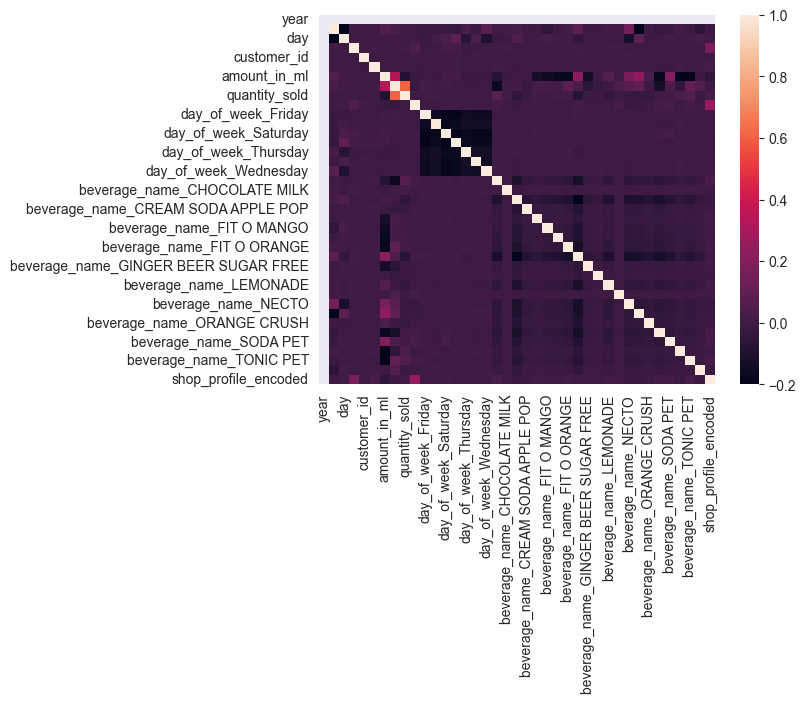

In [115]:
correlation_matrix = new_df.corr()

# Display the correlation matrix
print("Correlation between features:")
print(correlation_matrix)

#heatmap to visualize the correlation matrix between features
correlation_matrix = new_df.corr()
sns.heatmap(correlation_matrix, vmin=-0.2, vmax=1)
plt.show()

C:\Users\kasun\AppData\Local\Temp\ipykernel_1832\3267686190.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(correlations.index, rotation=90)


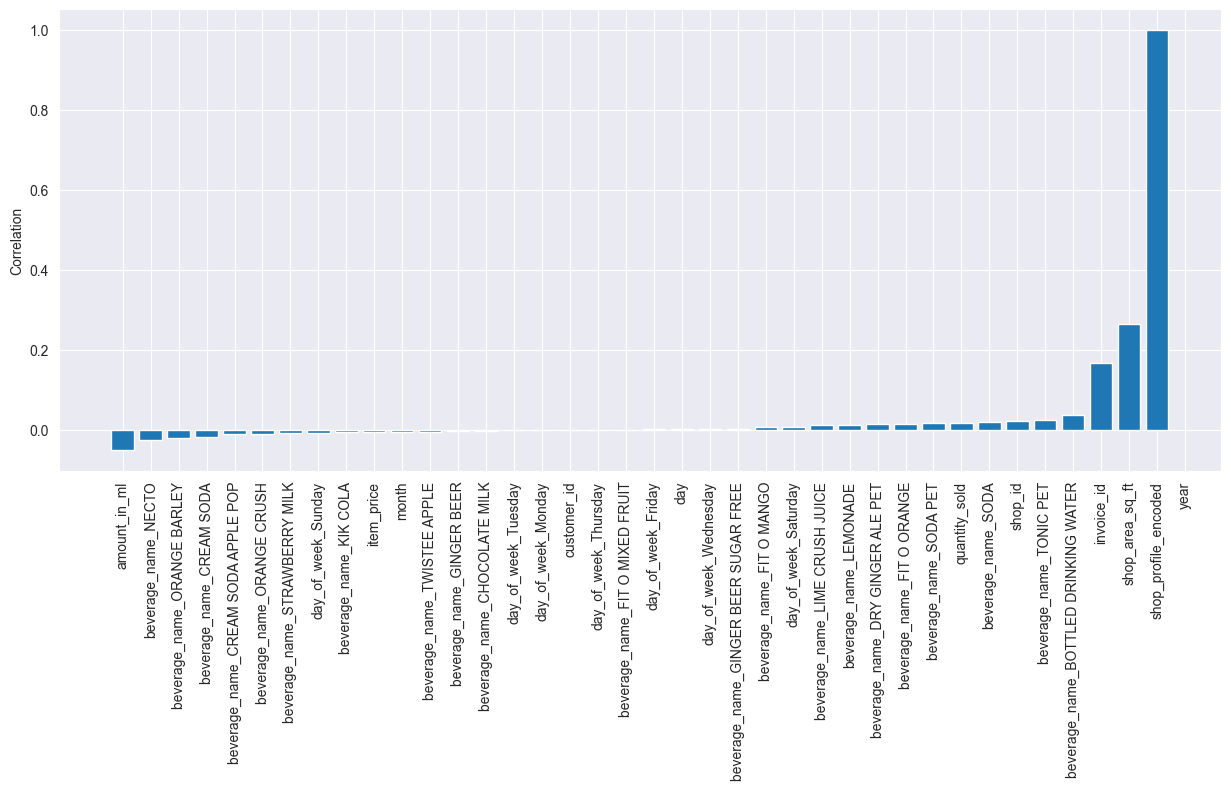

In [118]:
correlations = new_df.corr()['shop_profile_encoded'].sort_values()

#bar chart of the correlations
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(correlations.index, correlations)
ax.set_xticklabels(correlations.index, rotation=90)
ax.set_ylabel('Correlation')
plt.show()


In [119]:
new_df.to_csv("new_dataset_with_shop_encode.csv", index=False)

In [120]:
# Check if there is missing values
missing = new_df.isnull().sum()

# Printing numbers of missing values in each column
print("Missing Values")
print(missing)

Missing Values
year                                        0
month                                       0
day                                         0
invoice_id                                  0
customer_id                                 0
shop_id                                     0
amount_in_ml                            35928
item_price                                  0
quantity_sold                               0
shop_area_sq_ft                             0
shop_profile                            86633
day_of_week_Friday                          0
day_of_week_Monday                          0
day_of_week_Saturday                        0
day_of_week_Sunday                          0
day_of_week_Thursday                        0
day_of_week_Tuesday                         0
day_of_week_Wednesday                       0
beverage_name_BOTTLED DRINKING WATER        0
beverage_name_CHOCOLATE MILK                0
beverage_name_CREAM SODA                    0
beverage_name_CREAM

In [124]:
# Counting the number of duplicate rows
duplicates = new_df.duplicated().sum()
print("Duplicate rows = ", duplicates)

# Drop the duplicate rows and update the dataset
new_df.drop_duplicates(inplace=True)

# Verify there are no more duplicate records
assert new_df.duplicated().sum() == 0
print("No more duplicate records")

Duplicate rows =  0
No more duplicate records


In [125]:
new_df.dropna(subset=['amount_in_ml'], inplace=True)


In [126]:
# Check if there is missing values
missing = new_df.isnull().sum()

# Printing numbers of missing values in each column
print("Missing Values")
print(missing)

Missing Values
year                                        0
month                                       0
day                                         0
invoice_id                                  0
customer_id                                 0
shop_id                                     0
amount_in_ml                                0
item_price                                  0
quantity_sold                               0
shop_area_sq_ft                             0
shop_profile                            75116
day_of_week_Friday                          0
day_of_week_Monday                          0
day_of_week_Saturday                        0
day_of_week_Sunday                          0
day_of_week_Thursday                        0
day_of_week_Tuesday                         0
day_of_week_Wednesday                       0
beverage_name_BOTTLED DRINKING WATER        0
beverage_name_CHOCOLATE MILK                0
beverage_name_CREAM SODA                    0
beverage_name_CREAM

In [127]:
new_df.drop('shop_profile', axis=1, inplace=True)


In [128]:
# Drop rows with null values in the shop_profile column
dropped_records = new_df[new_df['shop_profile_encoded'].isnull()]
new_df = new_df.dropna(subset=['shop_profile_encoded'])

# Create new DataFrame with dropped records
dropped_df = pd.DataFrame(dropped_records)
# Save the dropped dataset to a new CSV file
dropped_df.to_csv('dropped-data.csv', index=False)

Missing Values
year                                    0
month                                   0
day                                     0
invoice_id                              0
customer_id                             0
shop_id                                 0
amount_in_ml                            0
item_price                              0
quantity_sold                           0
shop_area_sq_ft                         0
day_of_week_Friday                      0
day_of_week_Monday                      0
day_of_week_Saturday                    0
day_of_week_Sunday                      0
day_of_week_Thursday                    0
day_of_week_Tuesday                     0
day_of_week_Wednesday                   0
beverage_name_BOTTLED DRINKING WATER    0
beverage_name_CHOCOLATE MILK            0
beverage_name_CREAM SODA                0
beverage_name_CREAM SODA APPLE POP      0
beverage_name_DRY GINGER ALE PET        0
beverage_name_FIT O MANGO               0
beverage_name_FIT O